In [1]:
using Plots
gr(size=(600,400))
default(format = :png)

In [2]:
using NLPModels, Optimize

In [14]:
sigmodel(θ, x) = 1 / (1 + exp(-θ[end] - dot(θ[1:end-1], x)))

function logistic_classification(x, y)
    n, p = size(x)
    @assert length(y) == n
    @assert sort(unique(y)) == [0, 1]
    L(θ) = begin
        s = 0.0
        for i = 1:n
            hi = sigmodel(θ, x[i,:])
            s += y[i] == 1 ? log(hi) : log(1 - hi)
        end
        return -s
    end
    nlp = ADNLPModel(θ -> L(θ), zeros(p+1))
    stats = lbfgs(nlp)
    return stats.solution
end

logistic_classification (generic function with 1 method)

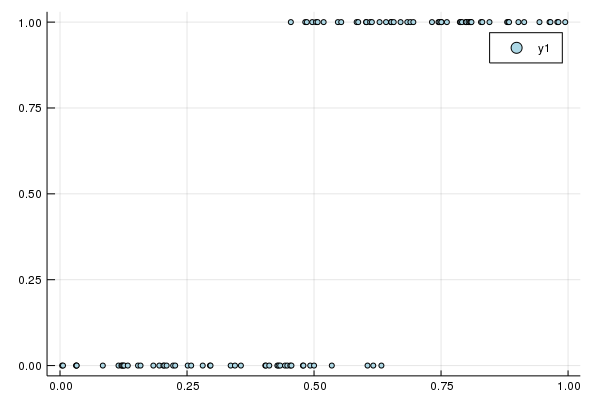

In [25]:
m = 100
x = sort(rand(m, 1), 1)
y = [x[i,1] > 0.5 + randn() * 0.1 ? 1.0 : 0.0 for i = 1:m]
scatter(x, y, m=(stroke(1),3,:lightblue))

In [26]:
θ = logistic_classification(x, y)

2-element Array{Float64,1}:
  20.0095
 -10.3221

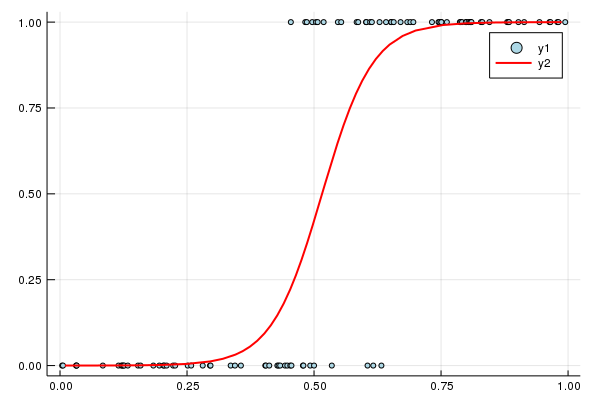

In [27]:
plot!(x -> sigmodel(θ, [x]), 0, 1, c=:red, lw=2)

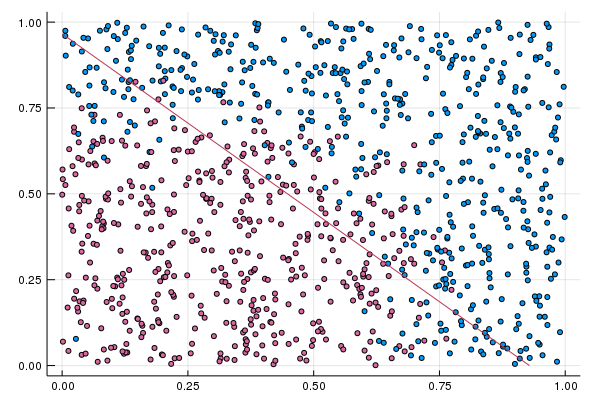

In [32]:
m = 1000
x = rand(m, 2)
y = [x[i,1]^4 + x[i,2]^4 + randn() * 0.1 > 0.25 ? 1 : 0 for i = 1:m]
θ = logistic_classification(x, y)

scatter(x[:,1], x[:,2], c=y, leg=false, m=(stroke(1),3))
contour!(linspace(0, 1, 100), linspace(0, 1, 100),
        (a,b) -> sigmodel(θ, [a;b]), levels=[0.5])

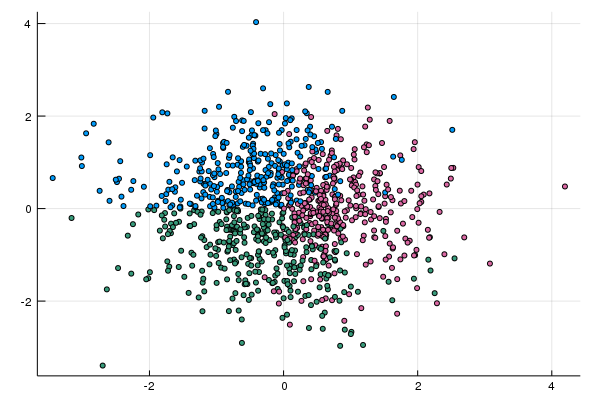

In [33]:
m = 1000
x = randn(m, 2)
y = round.(Int, randn(m) * 0.2 + 3 * atan2.(x[:,2], x[:,1]) / 2π)
y = max.(min.(y, 1), -1)

scatter(x[:,1], x[:,2], c=y, leg=false, m=(stroke(1),3))

In [34]:
ys = unique(y)
θs = [logistic_classification(x, y .== yi) for yi = ys]

3-element Array{Array{Float64,1},1}:
 [-1.94242, 3.38938, -1.89651] 
 [-1.46109, -3.14905, -1.78105]
 [2.93327, 0.226293, -1.39831] 

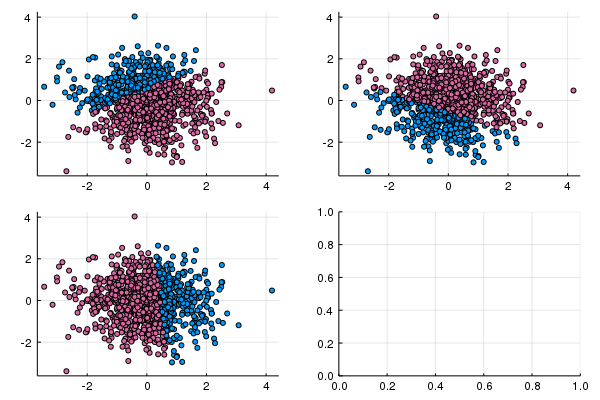

In [35]:
lay = @layout [a b; c d]
ypreds = [[sigmodel(θs[j], x[i,:]) for i = 1:m] for j = 1:3]
p = scatter(x[:,1], x[:,2], c=round.(Int, ypreds[1]), leg=false, m=(stroke(1),3), layout=lay)
scatter!(p[2], x[:,1], x[:,2], c=round.(Int, ypreds[2]), leg=false, m=(stroke(1),3), layout=lay)
scatter!(p[3], x[:,1], x[:,2], c=round.(Int, ypreds[3]), leg=false, m=(stroke(1),3), layout=lay)

In [11]:
function multipredict(θs, x)
    ypreds = [sigmodel(θ, x) for θ = θs]
    return indmax(ypreds)
end

multipredict (generic function with 1 method)

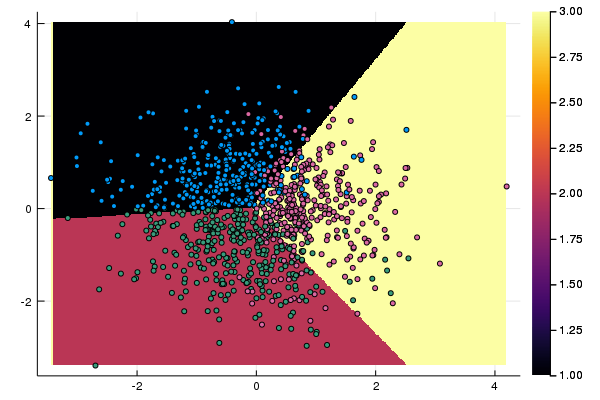

In [37]:
contourf(linspace(extrema(x[:,1])..., 400),
        linspace(extrema(x[:,2])..., 400),
        (a,b) -> multipredict(θs, [a; b]))
scatter!(x[:,1], x[:,2], c=y, leg=false, m=(stroke(1),3))

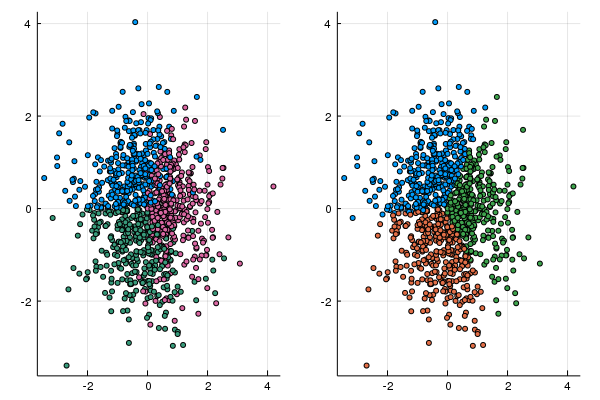

In [38]:
ypred = [multipredict(θs, x[i,:]) for i = 1:m]
p = scatter(x[:,1], x[:,2], c=y, leg=false, m=(stroke(1),3), layout=@layout([a b]))
scatter!(p[2], x[:,1], x[:,2], c=ypred, leg=false, m=(stroke(1),3), layout=@layout([a b]))